### ejercicio 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from scipy.special import expit
#la funcion expit es conocida como la funcion sigmoide logistica
#es definida como expit(x) = 1/(1+exp(-x))
#es la inversa de la funcion logit

In [4]:

n=50
mu0, sigma0 =0.5,0.5 # mean and standard deviation
X0 = np.random.normal(mu0, sigma0,n)
Y0=np.zeros(n)

mu1, sigma1 =2.5,0.5 # mean and standard deviation
X1 = np.random.normal(mu1, sigma1,n)
Y1=Y0+1



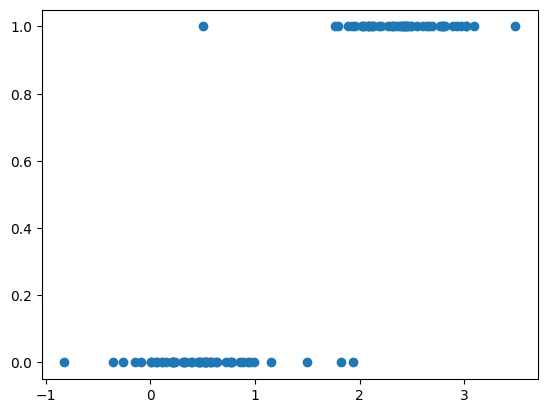

In [5]:
X = np.concatenate((X0,X1))
Y = np.concatenate((Y0,Y1))

x = X.reshape((-1,1))
y = Y
plt.scatter(X,Y);

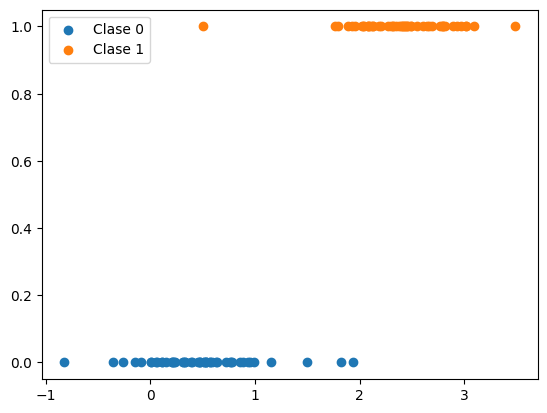

In [6]:
plt.scatter(X0, np.zeros_like(X0), label='Clase 0')
plt.scatter(X1, np.ones_like(X1), label='Clase 1')
plt.legend()
plt.show()


Regreciones


In [9]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.special import expit

#b)
linear = LinearRegression().fit(x,y)
y_lin= linear.coef_ * X + linear.intercept_

#c)
logistic = LogisticRegression().fit(x,y)
X_test = np.linspace(0,3,300)
y_log = expit(X_test * logistic.coef_ + logistic.intercept_).ravel()

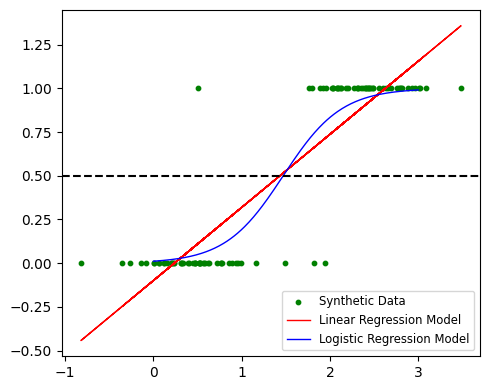

In [10]:
plt.figure(1, figsize=(5,4))

plt.scatter(X,Y,
            label='Synthetic Data',
            s=10,
            color='g')

plt.plot(X,y_lin,
         label='Linear Regression Model',
         linewidth=1,
         color='r')

plt.plot(X_test,y_log,
         label='Logistic Regression Model',
         linewidth=1,
         color='b')

plt.legend(
    loc='lower right',
    fontsize='small',
    )

plt.axhline(y=0.5, color='k',linestyle='--')
plt.tight_layout()
plt.show()

### ejercicio 2 (Perceptron)

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = cancer.data
y= cancer.target
target_names = cancer.target_names

len(X)

569

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25,random_state=142
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

perceptron

In [14]:
from sklearn.linear_model import Perceptron
model = Perceptron(tol=1e-3,random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
    )

Accuracy= 0.965034965034965
              precision    recall  f1-score   support

   malignant       0.93      0.98      0.96        58
      benign       0.99      0.95      0.97        85

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



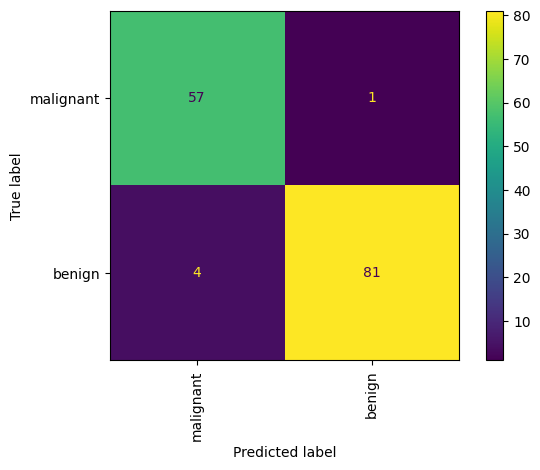

In [16]:
accuray= accuracy_score(y_test,y_pred)
print('Accuracy=',accuray)
print(classification_report(y_test,y_pred,target_names=target_names))
ConfusionMatrixDisplay.from_predictions(
    y_test,y_pred,display_labels=target_names, xticks_rotation='vertical'
)
plt.tight_layout()
plt.show()

Da casi igual la clasificación con bayes da acuraccy de 0.95

### ejercicio 3 (logistic regression cv)

In [25]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(cv=5, #cantidad de folds
                             penalty='l2', #penalización a utilizar en la regresión logística.
                             solver='liblinear', #el algoritmo a utilizar para resolver el problema de optimización en la regresión logística.
                             tol =1e-10,
                             max_iter=int(1e6))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Accuracy= 0.9790209790209791
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.97        58
      benign       0.99      0.98      0.98        85

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



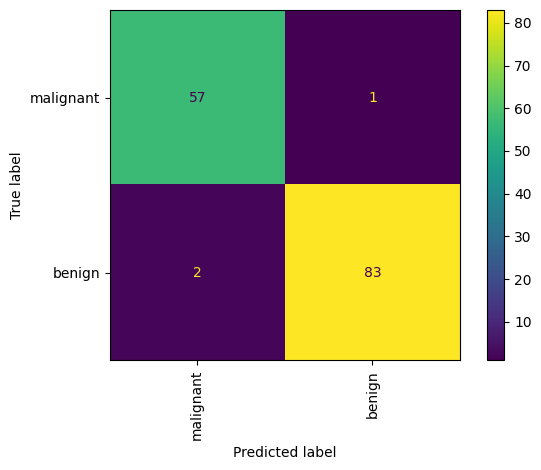

In [26]:
accuray= accuracy_score(y_test,y_pred)
print('Accuracy=',accuray)
print(classification_report(y_test,y_pred,target_names=target_names))
ConfusionMatrixDisplay.from_predictions(
    y_test,y_pred,display_labels=target_names, xticks_rotation='vertical'
)
plt.tight_layout()
plt.show()

La clase LogisticRegressionCV en la biblioteca scikit-learn de Python se utiliza para ajustar un modelo de regresión logística con una regularización incorporada y realizar la validación cruzada (cross-validation) para seleccionar automáticamente el mejor valor de regularización.

La validación cruzada es una técnica que se utiliza para evaluar el rendimiento de un modelo y seleccionar los hiperparámetros óptimos. Consiste en dividir el conjunto de datos en k subconjuntos o "folds" de tamaño similar. Luego, se realiza un proceso de entrenamiento y evaluación k veces, donde en cada iteración se selecciona un fold diferente como conjunto de prueba y los restantes se utilizan como conjunto de entrenamiento. De esta manera, se obtiene una estimación más robusta del rendimiento del modelo.

En el caso de LogisticRegressionCV, el parámetro cv indica el número de folds o subconjuntos a utilizar para la validación cruzada. Por ejemplo, si se establece cv=5, se realizará una validación cruzada de 5 veces. Esto significa que el conjunto de datos se dividirá en 5 subconjuntos de tamaño similar y se realizarán 5 iteraciones de entrenamiento y evaluación. Cada iteración utilizará un subconjunto diferente como conjunto de prueba y los restantes como conjunto de entrenamiento.

El propósito de utilizar la validación cruzada en LogisticRegressionCV es seleccionar el valor óptimo del parámetro de regularización (C) automáticamente. La regularización ayuda a controlar el sobreajuste en el modelo y seleccionar un valor adecuado es crucial para obtener un modelo con buen rendimiento y generalización. La clase LogisticRegressionCV realiza una búsqueda exhaustiva de los valores de C en una escala logarítmica y selecciona automáticamente el valor óptimo utilizando la validación cruzada.

En resumen, LogisticRegressionCV utiliza la validación cruzada (cv) para seleccionar automáticamente el mejor valor de regularización (C) al ajustar un modelo de regresión logística. Esto ayuda a mejorar el rendimiento y la generalización del modelo.








El modelo LogisticRegressionCV utiliza cross-validation para estimar la capacidad predictiva del modelo. La idea es dividir los datos en varios pliegues (folds) y realizar el ajuste y evaluación del modelo varias veces, alternando los pliegues utilizados en cada ajuste. De esta forma, se puede obtener una medida más robusta del rendimiento del modelo, ya que se evita el sobreajuste a los datos de entrenamiento y se obtiene una evaluación más representativa del rendimiento en datos no vistos.
Por ejemplo, en el caso de la validación cruzada con k pliegues (k-fold cross-validation), se divide el conjunto de datos en k subconjuntos de igual tamaño. Luego se entrena el modelo en k-1 subconjuntos y se evalúa el rendimiento en el subconjunto restante. Este proceso se repite k veces, de modo que cada subconjunto es utilizado una vez para evaluación y k-1 veces para entrenamiento.